In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


sns.set_palette('viridis')

In [6]:
# Load the dataset
df = pd.read_csv('used_cars.csv')

# Check basic information
print(f'Dataset shape: {df.shape}')

Dataset shape: (4009, 12)


In [7]:
# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values by column:")
print(df.isnull().sum())


First 5 rows:
      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Au

In [8]:
# Make a copy of the dataframe for cleaning
cars_clean = df.copy()

# Convert price to numeric, removing '$' and ',' characters
cars_clean['price'] = cars_clean['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Convert mileage to numeric, removing ',' characters and 'mi.' text
cars_clean['mileage'] = cars_clean['milage'].str.replace(',', '', regex=False).str.replace(' mi.', '', regex=False).astype(float)

# Check the cleaned columns
print("Sample of cleaned price and mileage columns:")
print(cars_clean[['price', 'mileage']].head())

Sample of cleaned price and mileage columns:
     price  mileage
0  10300.0  51000.0
1  38005.0  34742.0
2  54598.0  22372.0
3  15500.0  88900.0
4  34999.0   9835.0


In [9]:
# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(cars_clean[['price', 'mileage', 'model_year']].describe())


Summary statistics for numeric columns:
              price        mileage   model_year
count  4.009000e+03    4009.000000  4009.000000
mean   4.455319e+04   64717.551010  2015.515590
std    7.871064e+04   52296.599459     6.104816
min    2.000000e+03     100.000000  1974.000000
25%    1.720000e+04   23044.000000  2012.000000
50%    3.100000e+04   52775.000000  2017.000000
75%    4.999000e+04   94100.000000  2020.000000
max    2.954083e+06  405000.000000  2024.000000


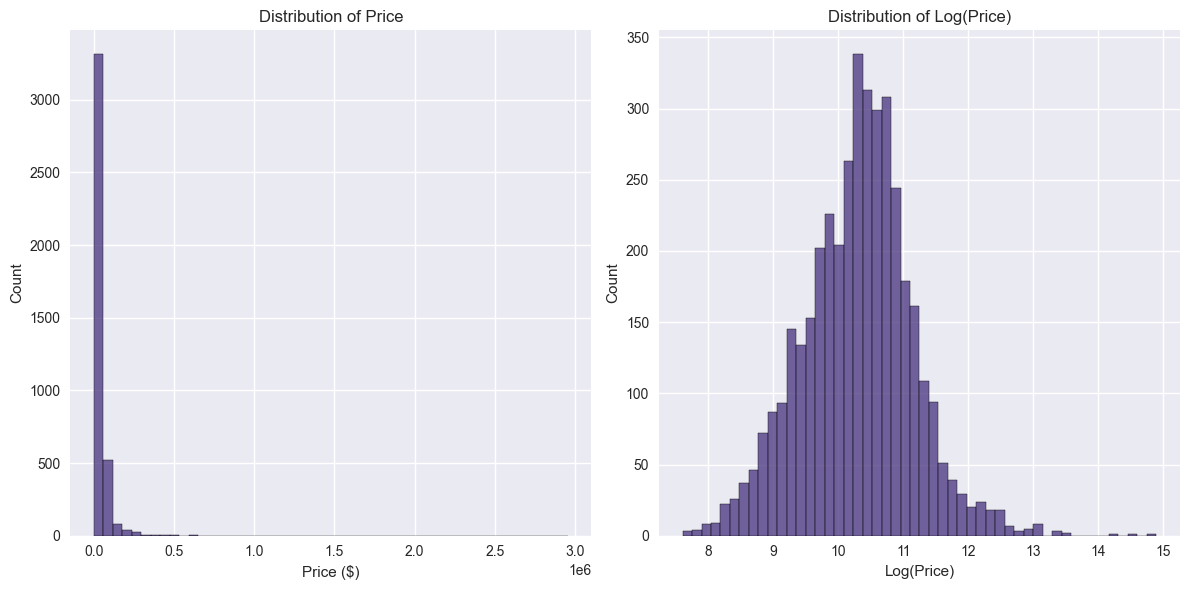

In [10]:
# Plot price distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(cars_clean['price'], bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price ($)')

# Plot log-transformed price for comparison
plt.subplot(1, 2, 2)
cars_clean['log_price'] = np.log(cars_clean['price'])
sns.histplot(cars_clean['log_price'], bins=50)
plt.title('Distribution of Log(Price)')
plt.xlabel('Log(Price)')

plt.tight_layout()
plt.show()

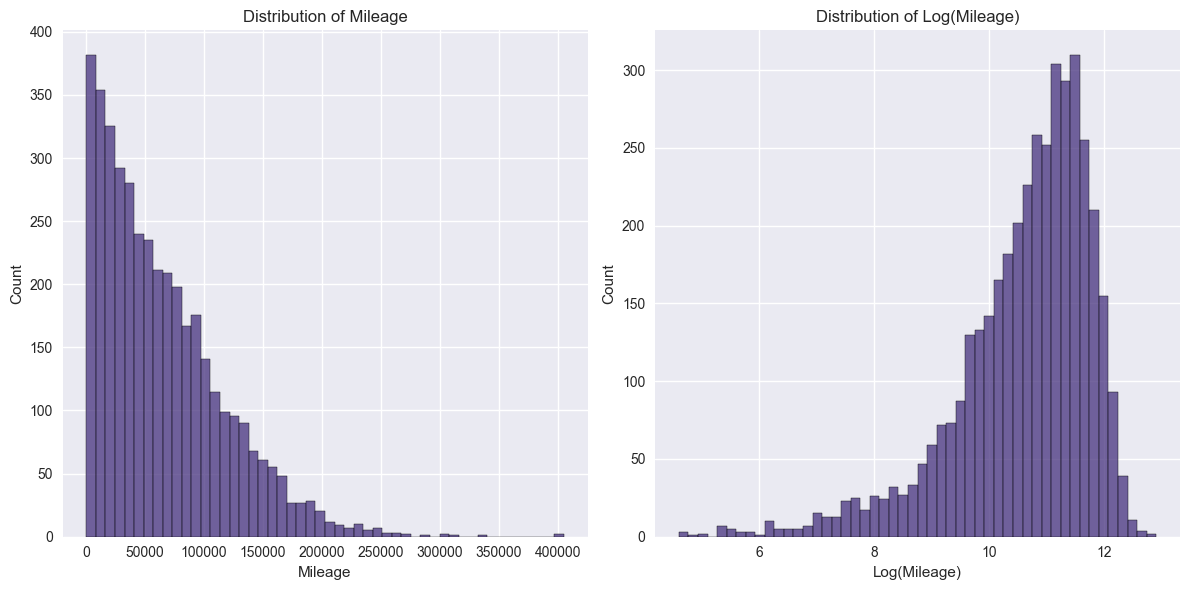

In [11]:
# Plot mileage distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(cars_clean['mileage'], bins=50)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')

# Plot log-transformed mileage
plt.subplot(1, 2, 2)
cars_clean['log_mileage'] = np.log(cars_clean['mileage'])
sns.histplot(cars_clean['log_mileage'], bins=50)
plt.title('Distribution of Log(Mileage)')
plt.xlabel('Log(Mileage)')

plt.tight_layout()
plt.show()

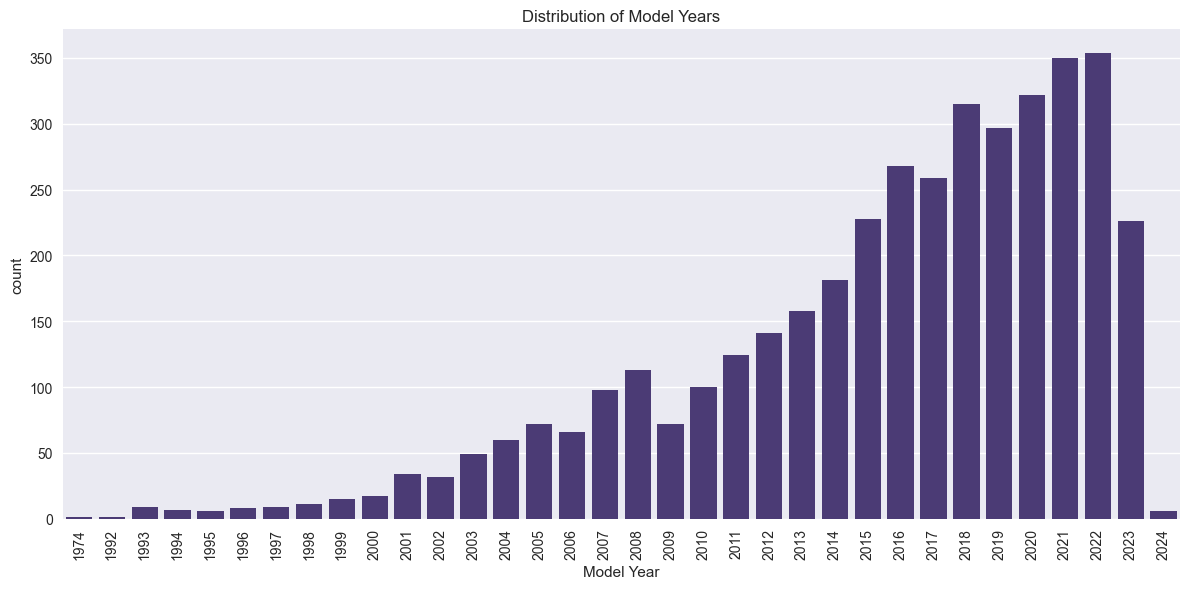

In [12]:
# Plot model year distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='model_year', data=cars_clean)
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

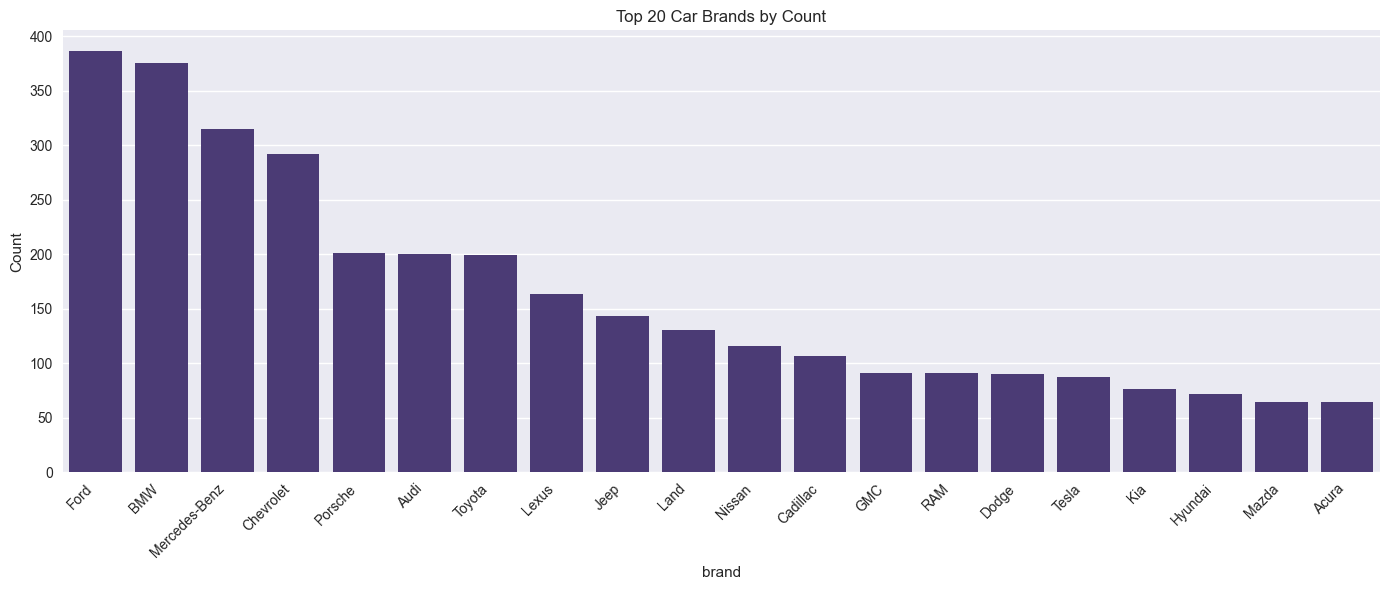

In [13]:
# Count of cars by brand
plt.figure(figsize=(14, 6))
brand_counts = cars_clean['brand'].value_counts().head(20)
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Top 20 Car Brands by Count')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Models available for Toyota:
model
Land Cruiser Base         12
Highlander XLE            10
Sequoia Limited            7
FJ Cruiser Base            7
Tundra SR5                 7
                          ..
Highlander LE Plus         1
GR86 Base                  1
Tundra Hybrid Capstone     1
4Runner TRD Off Road       1
Tundra Grade               1
Name: count, Length: 98, dtype: int64


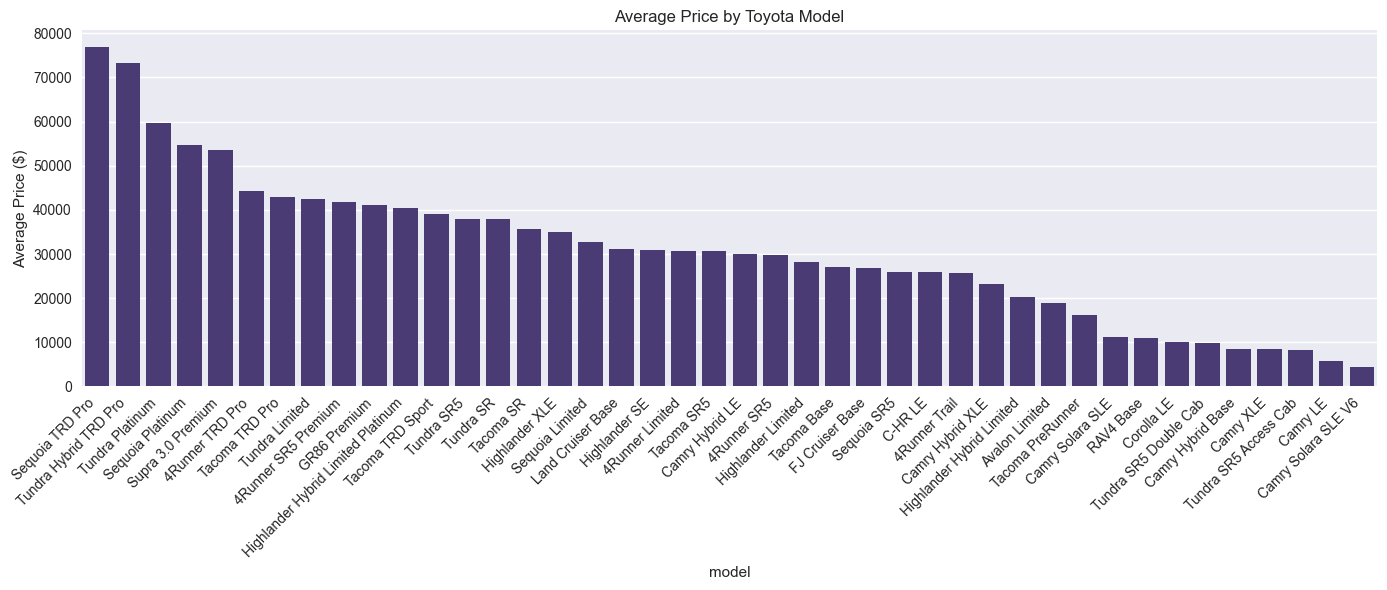

In [14]:
# Choose a specific brand
selected_brand = "Toyota"  # Change this to any brand you're interested in

# Get data for the selected brand
brand_data = cars_clean[cars_clean['brand'] == selected_brand]

# Show models available for this brand
print(f"Models available for {selected_brand}:")
print(brand_data['model'].value_counts())

# Plot average price by model for this brand
plt.figure(figsize=(14, 6))
model_prices = brand_data.groupby('model')['price'].mean().sort_values(ascending=False)

# Only include models with at least 2 cars
model_prices = model_prices[brand_data['model'].value_counts()[model_prices.index] >= 2]

sns.barplot(x=model_prices.index, y=model_prices.values)
plt.title(f'Average Price by {selected_brand} Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

Found 19 Toyota Camry entries


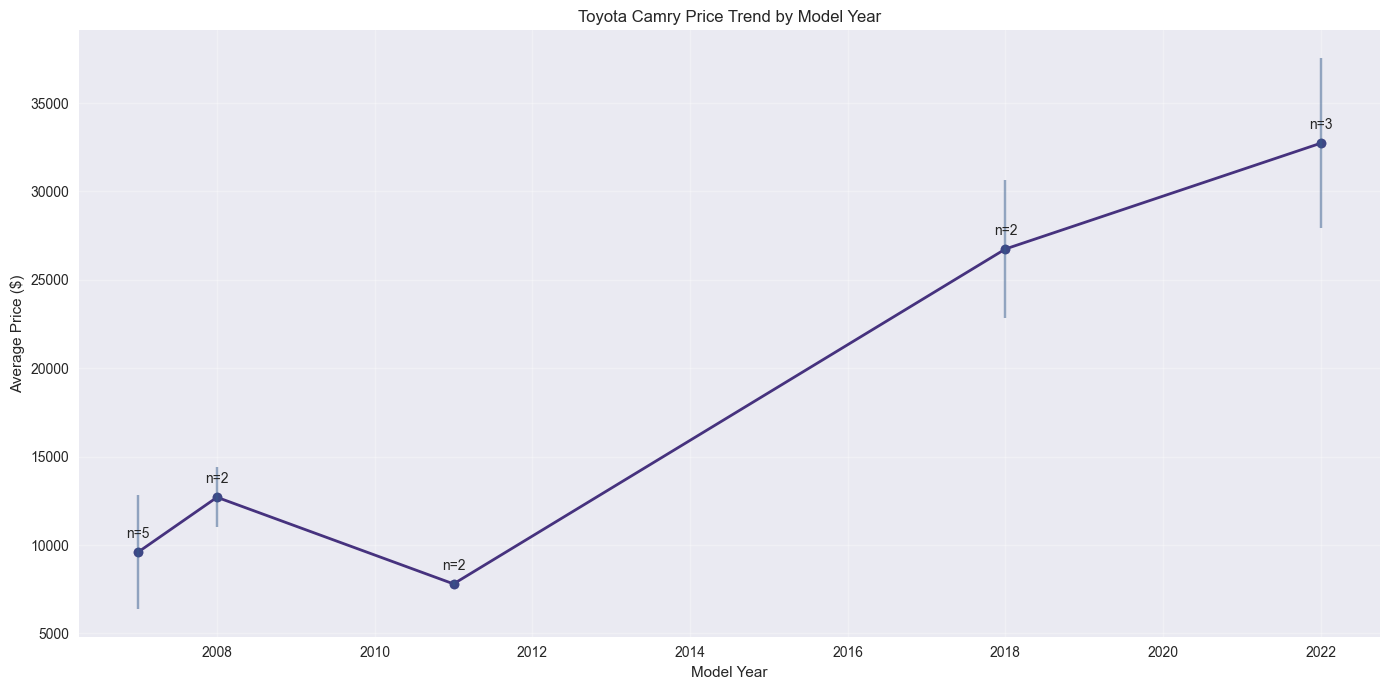

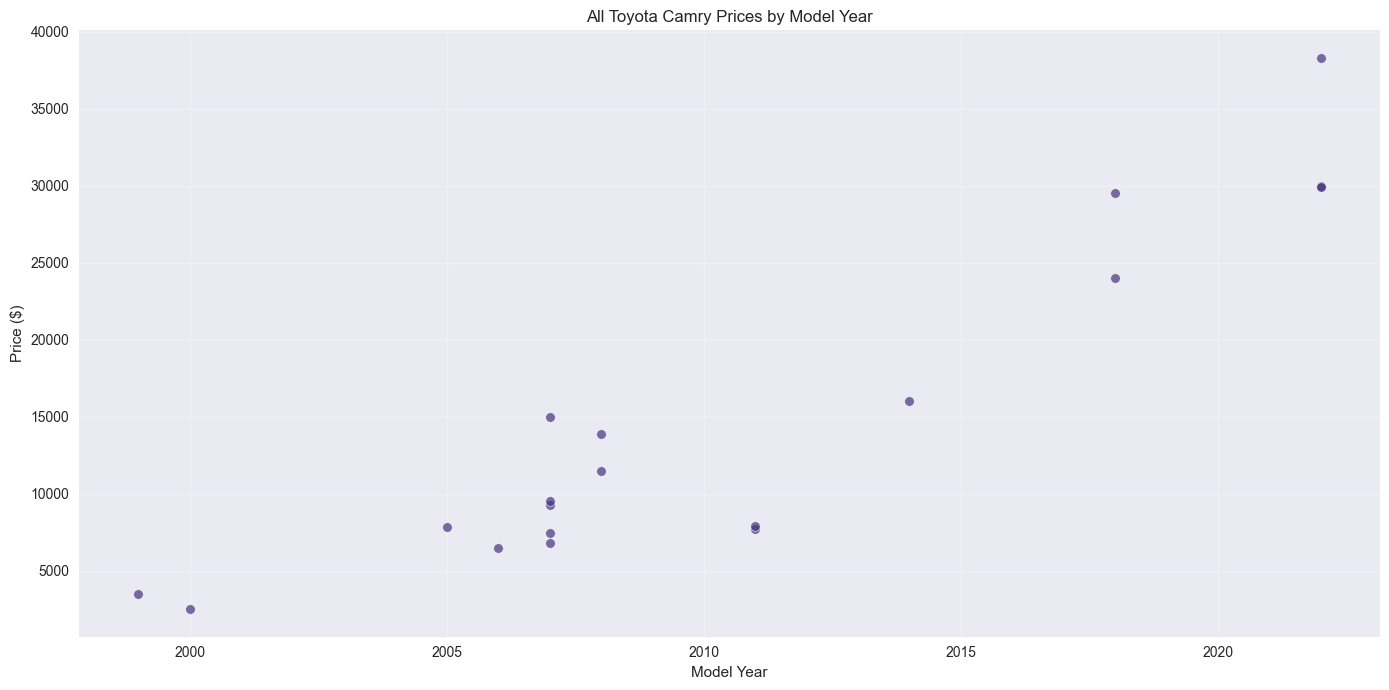

In [15]:
# Filter for just Toyota Camry
camry_data = cars_clean[cars_clean['model'].str.contains('Camry', case=False, na=False)]

# Check if we have data
if len(camry_data) > 0:
    print(f"Found {len(camry_data)} Toyota Camry entries")
    
    # Group by model year and calculate statistics
    camry_by_year = camry_data.groupby('model_year').agg({
        'price': ['mean', 'median', 'count', 'std']
    }).reset_index()
    
    # Flatten the column names
    camry_by_year.columns = ['model_year', 'mean_price', 'median_price', 'count', 'std_price']
    
    # Only include years with at least 2 cars for more reliable averages
    camry_by_year = camry_by_year[camry_by_year['count'] >= 2]
    
    # Plot average price by year
    plt.figure(figsize=(14, 7))
    
    # Plot the mean price line
    plt.plot(camry_by_year['model_year'], camry_by_year['mean_price'], 'o-', linewidth=2, label='Mean Price')
    
    # Add error bars showing standard deviation
    plt.errorbar(camry_by_year['model_year'], camry_by_year['mean_price'], 
                 yerr=camry_by_year['std_price'], fmt='o', capsize=5, alpha=0.5)
    
    # Add data points showing sample size
    for i, row in camry_by_year.iterrows():
        plt.annotate(f"n={int(row['count'])}", 
                    (row['model_year'], row['mean_price']), 
                    textcoords="offset points",
                    xytext=(0,10), 
                    ha='center')
    
    plt.title('Toyota Camry Price Trend by Model Year')
    plt.xlabel('Model Year')
    plt.ylabel('Average Price ($)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Also show a scatter plot of all Camry data points
    plt.figure(figsize=(14, 7))
    sns.scatterplot(x='model_year', y='price', data=camry_data, alpha=0.7)
    plt.title('All Toyota Camry Prices by Model Year')
    plt.xlabel('Model Year')
    plt.ylabel('Price ($)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("No Toyota Camry models found in the dataset.")
    
    # Alternative suggestion
    print("\nHere are the most common models in the dataset:")
    print(cars_clean['model'].value_counts().head(10))
    print("\nYou can modify the code to analyze one of these models instead.")